# Customer Personality Analysis

## Latar Belakang

Saya di simulasikan sebagai Data Analyst yang di hired sebuah perusahaan untuk melakukan Customer Personality Analysis yang digunakan untuk mempertimbangkan mencari pelanggan ideal bagi suatu perusahaan, perlu di ingat saya memposisikan pengolahan data ini pada tahun 2016 

## Pernyataan Masalah 
Perusahaan ingin mengetahui customer bagian mana yang paling ideal 

# Data

Untuk menjawab permasalahan di atas, saya akan menganalisa data Marketing_Campaign yang telah di buat oleh perusahaan.

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu,ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait 

In [73]:
all_data = pd.read_csv('marketing_campaign.csv')
all_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Terdapat 29 Kolom Pada Data set yang pengertiannya masing masing sebagai berikut:

People

- ID: Id unik tiap customer
- Year_Birth: Tahun kelahiran
- Education: Tingkat pendidikan customer
- Marital_Status: Status perkawinan customer
- Income: Pendapatan customer per tahun
- Kidhome: Jumlah anak kecil yang dimiliki customer
- Teenhome: Jumlah anak remaja yang dimiliki customer
- Dt_Customer: Tanggal pendaftaran customer ke perusahaan
- Recency: Jumlah hari sejak customer melakukan transaksi terakhir
- Complain: 1 jika customer melakukan komplain sejak dua tahun terakhir, 0 lainnya

Products

- MntWines: Jumlah belanja untuk produk Wine selama dua tahun terakhir
- MntFruits: Jumlah belanja untuk produk Buah selama dua tahun terakhir
- MntMeatProducts: Jumlah belanja untuk produk daging selama dua tahun terakhir
- MntFishProducts: Jumlah belanja untuk produk Ikan selama dua tahun terakhir
- MntSweetProducts: Jumlah belanja untuk produk Manisan selama dua tahun terakhir
- MntGoldProds: Jumlah belanja untuk produk Emas selama dua tahun terakhir

Promotion

- NumDealsPurchases: Jumlah pembelian menggunakan diskon
- AcceptedCmp1: 1 jika customer menerima penawaran di usaha pemasaran ke-1, 0 lainnya
- AcceptedCmp2: 1 jika customer menerima penawaran di usaha pemasaran ke-2, 0 lainnya
- AcceptedCmp3: 1 jika customer menerima penawaran di usaha pemasaran ke-3, 0 lainnya
- AcceptedCmp4: 1 jika customer menerima penawaran di usaha pemasaran ke-4, 0 lainnya
- AcceptedCmp5: 1 jika customer menerima penawaran di usaha pemasaran ke-5, 0 lainnya
- Response: 1 jika customer menerima penawaran di usaha pemasaran yang terakhir, 0 lainnya

Place

- NumWebPurchases: Jumlah pembelian melalui website perusahaan
- NumCatalogPurchases: Jumlah pembelian melalui menggunakan katalog
- NumStorePurchases: Jumlah pembelian langsung di toko
- NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan pada bulan terakhir

## Data Understanding dan Cleaning

##### Sebelum masuk ke dalam analisis, saya akan mencari anomali anomali yang terdapat dalam data set kemudian memfilter data yang akan digunakan untuk menjadi acuan saya dalam menganalisis.

### Column pada data set 

In [74]:
print (f'Jumlah baris dan kolom di data set all_Data adalah {all_data.shape}')
print('Kolom pada data set:')
all_data.info()

Jumlah baris dan kolom di data set all_Data adalah (2240, 29)
Kolom pada data set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGo

##### Dari informasi di atas di dapat total baris dan kolom pada data set all_data sebesar (2240, 29), kolom pada data set tebagi atas 3 jenis yaitu : float 1 , integer 25, object 3.

### Mencari Data Kosong

In [75]:
print('Presentasi data kosong di setiap kolom: ')
all_data.isna().sum()* 100 / len(all_data)

Presentasi data kosong di setiap kolom: 


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Dari hasil di atas ditemukan di dalam data set pada kolom 'Income' terdapat data kosong sebesar 1,07 persen

Drop na value 

<AxesSubplot: >

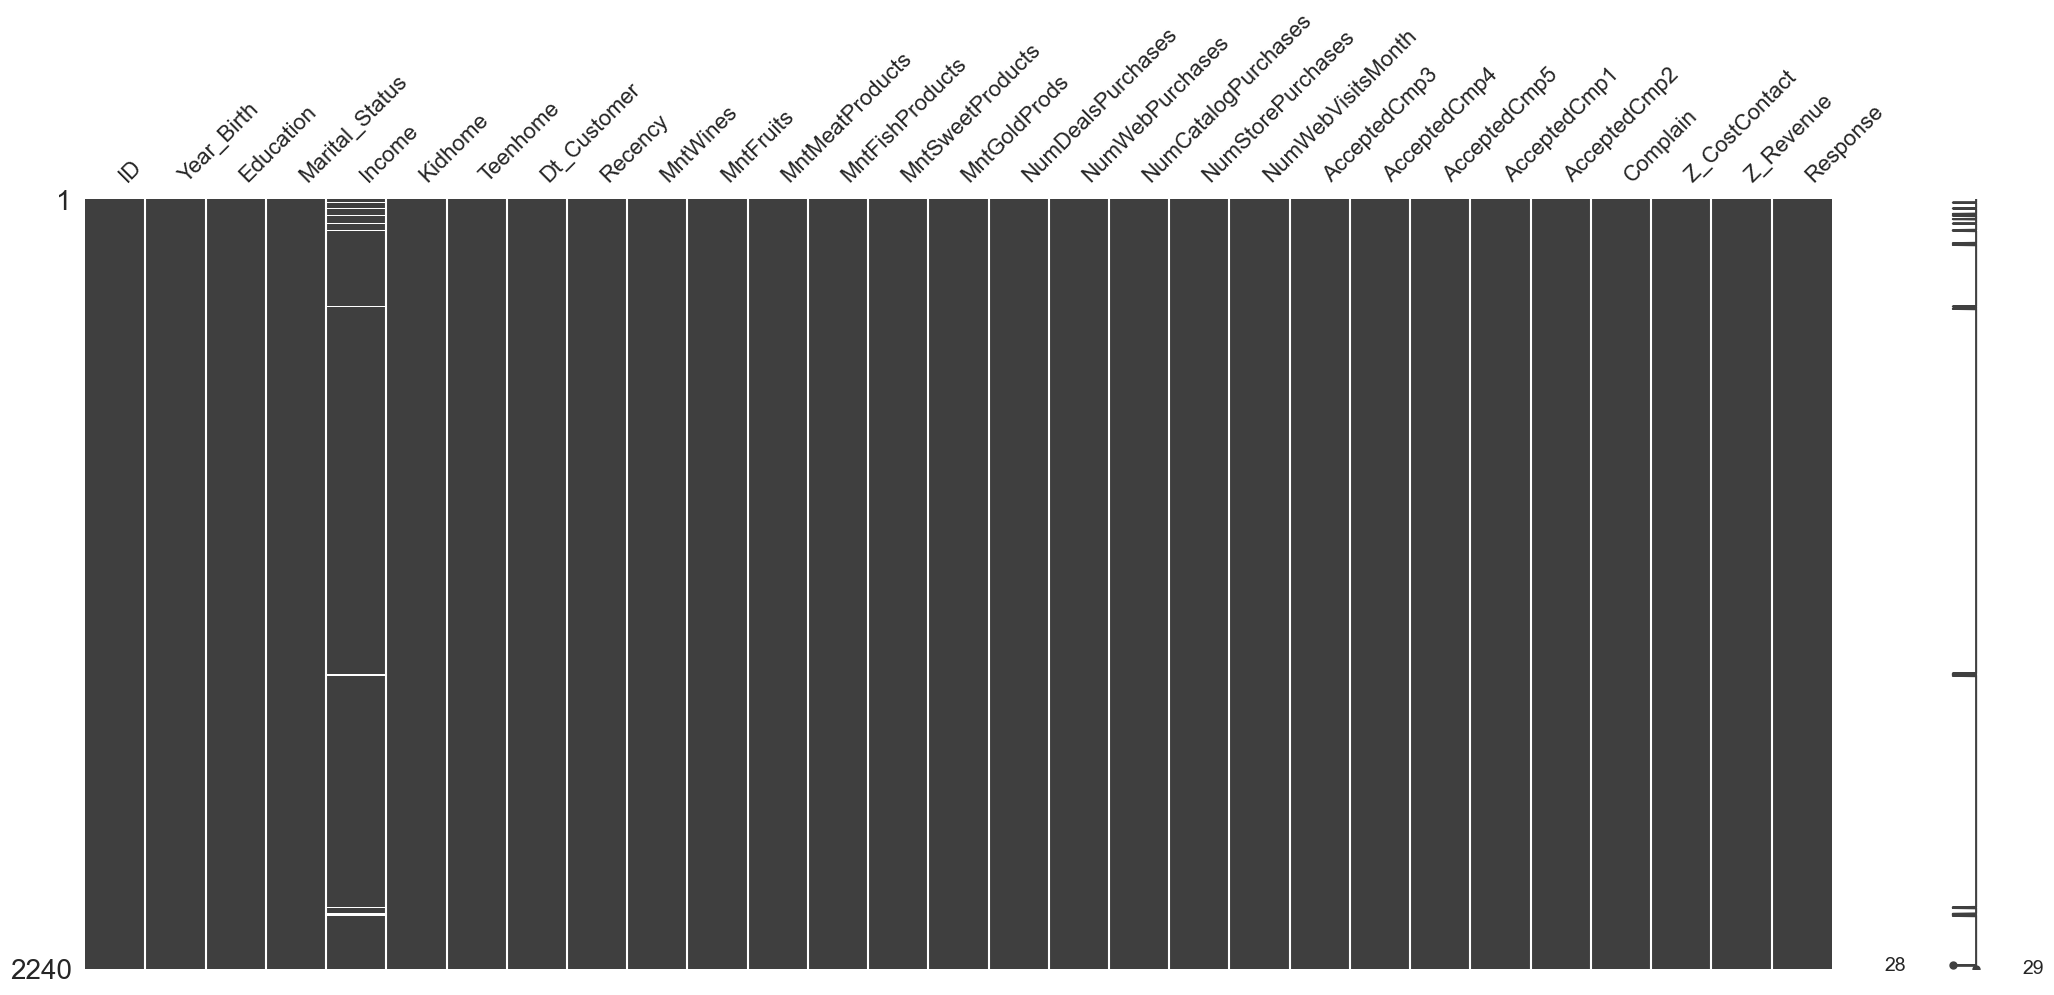

In [76]:
import missingno as msno
msno.matrix(all_data)

##### Secara Garis Besar :
- missing value hanya terdapat pada kolom 'Income' dengan presentasi yang kecil ya itu hanya 1,07 % 
- Untuk mengatasi missing value tersebut saya akan melakukan drop value di karenakan presentasi missing value yang kecil


In [77]:
# menghilangkan baris yang memiliki nilai kosong
all_data = all_data.dropna()
all_data.isna().sum() 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Mencari Jika ada Data yang Duplikat 

In [78]:
all_data[all_data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Tidak ditemukan adanya duplikat data

In [79]:
all_data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#### Mencari Anomali Data

Saya akan memulai dengan mengecek coloum dengan tipe object jika ada salah penulisan 

In [80]:
all_data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

saya akan memasukan Phd, Master, dan 2n cycle ke dalam bagian graduation untuk memudahkan data yang melanjutkan study dan yang tidak melanjutkan study

In [81]:
all_data['Education'] = all_data['Education'].replace(['PhD','Master','2n Cycle'], 'Graduation')
all_data['Education'].value_counts()

Graduation    2162
Basic           54
Name: Education, dtype: int64

Kolom Marital Status

In [82]:
all_data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Pertama saya akan mempersimpel bagian ini dengan membagi hanya Single dan Relationship 

In [83]:
all_data['Marital_Status'] = all_data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single' )
all_data['Marital_Status'] = all_data['Marital_Status'].replace(['Married', 'Together'], 'InRelationship')
all_data['Marital_Status'].value_counts()

InRelationship    1430
Single             786
Name: Marital_Status, dtype: int64

Dt_Customer

In [84]:
all_data['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64

In [85]:
#mengecek jika ada salah penulisan di dalam kolom 
def get_month (Date):
    return Date.split('-')[1]
all_data['Dt_Customer'].apply (lambda x: get_month(x)).value_counts()

08    219
05    213
10    210
03    209
01    195
09    191
11    183
04    181
02    177
12    175
06    163
07    100
Name: Dt_Customer, dtype: int64

Tidak ada salah penulisan dalam tanggal berarti selanjutnya data bisa di ubah ke format date time

In [86]:
all_data['Dt_Customer'] = pd.to_datetime(all_data['Dt_Customer'])
all_data['Dt_Customer']


0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

dapat di lihat data 'Dt_customer' sudah di rubah ke dalam bentuk datetime[ns]

Complain

In [87]:
all_data['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

### Penambahan Kolom Baru 

Kolom Total Purchases

In [88]:
all_data['Total Purchases'] = all_data['MntFishProducts'] + all_data['MntFruits']+all_data['MntGoldProds'] + all_data['MntMeatProducts'] + all_data['MntSweetProducts'] + all_data['MntWines']



Membuat kolom baru yang berisikan penggabungan kolom anak 

In [89]:
all_data['NumOfChild'] = all_data['Kidhome'] + all_data['Teenhome']


Kolom Kategori Income

Dalam Kolom Ini saya akan membuat Kolom Baru yaitu kolom Income Group dimana didalam kolom ini saya membaginya berdasarkan Icome yang mengikuti sistem yang ada di USA 

Kenapa saya memilih menggunakan sistem pembagian USA karena dalam data set mendukung untuk mengkategorikan income yang ada dalam data set dimana ada kolom berisikan informasi anak , status pernikahan seta income itu sendiri dan kolom income yang ada mendukung mengingat itu pendapatan income dalam satu tahun 

Sistem yang saya ikut juga berdasarkan data pada tahun 2016 oleh PEW RESEARCH CENTER yang dapat di akses sebagai berikut : https://www.pewresearch.org/fact-tank/2018/09/06/the-american-middle-class-is-stable-in-size-but-losing-ground-financially-to-upper-income-families/

In [90]:
def incomecouple(income):
    if income < 36902:
        return 'Low Income'
    elif 36902 <= income < 110706:
        return 'Middle Income'
    elif income >= 110706:
        return 'Upper income'

def incomefamilyof3(income):
    if income < 45195:
        return 'Low Income'
    elif 45195 <= income < 135586:
        return 'Middle Income'
    elif income >= 135586:
        return 'Upper income'

def incomefamilyof4(income):
    if income < 52187:
        return 'Low Income'
    elif 52187 <= income < 156561:
        return 'Middle Income'
    elif income >= 156561:
        return 'Upper income'

def incomefamilyof5(income):
    if income < 58347:
        return 'Low Income'
    elif 58347 <= income < 175041:
        return 'Middle Income'
    elif income >= 175041:
        return 'Upper income'

def income_group (income,martial_status,numofchild):
    if martial_status == 'Single':
        if numofchild == 0:
            if income < 26093:
                return 'Low Income'
            elif 26093 <= income < 78281:
                return 'Middle Income'
            elif income >= 78281:
                return 'Upper income'
        elif numofchild == 1 :
            return incomecouple(income)
        elif numofchild == 2 :
            return incomefamilyof3(income)
        elif numofchild == 3 :
            return incomefamilyof4(income)
    if martial_status == 'InRelationship':
        if numofchild == 0 :
            return incomecouple(income)
        elif numofchild == 1 :
            return incomefamilyof3(income)
        elif numofchild == 2 :
            return incomefamilyof4(income)
        elif numofchild == 3 :
            return incomefamilyof5(income)


all_data['Income Group'] = all_data.apply(lambda x : income_group(x.Income, x.Marital_Status, x.NumOfChild), axis=1)
all_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total Purchases,NumOfChild,Income Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,3,11,1,1617,0,Middle Income
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,3,11,0,27,2,Middle Income
2,4141,1965,Graduation,InRelationship,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,0,Middle Income
3,6182,1984,Graduation,InRelationship,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,3,11,0,53,1,Low Income
4,5324,1981,Graduation,InRelationship,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,1,Middle Income


Penambahan Kolom TotAccCmp 

In [91]:
all_data['TotAccCmp'] = all_data['AcceptedCmp1']+all_data['AcceptedCmp2']+all_data['AcceptedCmp3']+all_data['AcceptedCmp4']+all_data['AcceptedCmp5']+all_data['Response']
all_data['TotAccCmp'].value_counts()

0    1611
1     369
2     139
3      51
4      36
5      10
Name: TotAccCmp, dtype: int64

Membuat data frame baru yang berkaitan dengan analysis yang bermanfaat bagi perusahaan

In [92]:
df = all_data.drop(['ID','Kidhome' ,'Teenhome','Z_CostContact','Z_Revenue', 'Education','AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','NumWebVisitsMonth'],axis=1)
df.head()

,Year_Birth,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total Purchases,NumOfChild,Income Group,TotAccCmp
0,1957,Single,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,0,1617,0,Middle Income,1
1,1954,Single,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,0,27,2,Middle Income,0
2,1965,InRelationship,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,0,776,0,Middle Income,0
3,1984,InRelationship,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,0,53,1,Low Income,0
4,1981,InRelationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,0,422,1,Middle Income,0


In [93]:
df.describe()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total Purchases,NumOfChild,TotAccCmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,0.009477,607.075361,0.947202,0.448556
std,11.985554,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,0.096907,602.900476,0.749062,0.892440
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1959.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,0.000000,69.000000,0.000000,0.000000
50%,1970.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,0.000000,396.500000,1.000000,0.000000
75%,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,0.000000,1048.000000,1.000000,1.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,1.000000,2525.000000,3.000000,5.000000


outlier

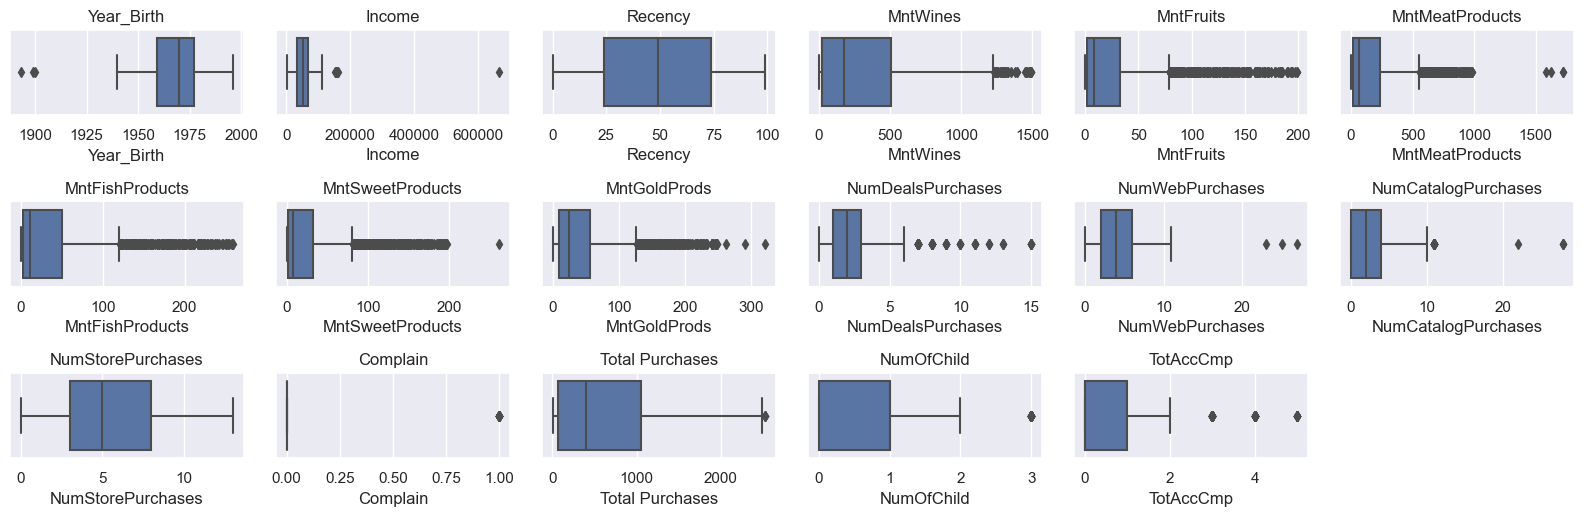

In [94]:
columns = list(df.select_dtypes(include=['int64','float64'])) 


plt.figure(figsize=(16,10))
sns.set_style('darkgrid')
plotnum = 1

for col in columns:
    ax = plt.subplot(6,6, plotnum)
    sns.boxplot(x=col, data= df)
    plt.title(col)
    plt.tight_layout()
    plotnum +=1


Dari visualisasi boxplot di atas kita dapat melihat outlier pada setiap kolom numerikal yaitu pada kolom 
- Year_Birth
- MntMeatProducts
- MntSweetProducts
- MntGoldProds
- Income

Selanjutnya saya akan membuat data frame yang berisikan data outlier untuk di liat dan di analisa apakah data tersebut memang tidak masuk akal atau terdapat eror dalam penulisan data

In [95]:
data_outlier = df[((df['Income'] > 600000) | (df['Year_Birth'] < 1930) | (df['MntMeatProducts'] > 1500) | (df['MntSweetProducts'] > 200) | (df['MntGoldProds']>250 ))]
data_outlier

,Year_Birth,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total Purchases,NumOfChild,Income Group,TotAccCmp
21,1979,InRelationship,2447.0,2013-06-01,42,1,1,1725,1,1,1,15,0,28,0,0,1730,1,Low Income,0
164,1973,InRelationship,157243.0,2014-01-03,98,20,2,1582,1,2,1,15,0,22,0,0,1608,1,Upper income,0
192,1900,Single,36640.0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,1,65,1,Low Income,0
239,1893,Single,60182.0,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,0,22,1,Middle Income,0
339,1899,InRelationship,83532.0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,0,1853,0,Middle Income,1
687,1982,InRelationship,160803.0,2012-04-08,21,55,16,1622,17,3,4,15,0,28,1,0,1717,0,Upper income,0
1328,1982,Single,6560.0,2013-12-12,2,67,11,26,4,3,262,0,1,0,1,0,373,0,Low Income,0
1653,1977,InRelationship,157146.0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,0,1730,0,Upper income,0
1806,1966,Single,7144.0,2013-07-12,92,81,4,33,5,2,291,0,23,1,1,0,416,2,Low Income,0
1898,1945,Single,113734.0,2014-05-28,9,6,2,3,1,262,3,0,27,0,0,0,277,0,Upper income,0


Income :
- Dapat di lihat outlier pada income sangat jauh di bandingkan lainnya yaitu pada angka pendapatan 666.666$ yang tidak berbanding lurus dengan jumlah pembelian yang di buat serta nominal income yang terulis 1 angka berulang jadi dapat dikatakan kemungkinan terjadi salah penulisan income

Year_Birth :
- Dalam kolom ini terdapat 3 data outlier yang masing-masing value sangat tidak masuk akal dimana customer berumur lebih dari seratus tahun kemungkinan terjadi salah penulisan data 

MntMeatProducts :
- Dalam kolom ini terdapat 4 data outlier pada kolom ini sudah jelas terlihat kesenanjangan pembelian produk daging dimana dibandingkan dengan data yang terdekat dari data outlier ini terdapat selisi 500 maka data ini akan dihilangkan 

MntSweatProducts :
- Terdapat 1 data outlier tetapi data ini masih bisa di anggap masuk akal karena jika dilihat dari income customers 113734$ dan pembelian sweetproduct sejumlah 262, tetapi karena ketimpangan yang sagat jauh dengan data yang lain maka data ini tetap akan di hilangkan untuk kebutuhan analysis

MntGoldProds : 
- Terdapat 3 data outlier dengan masing masing value jumlah pembelian gold sebesar 262, 291 , dan 321 jika di lihat dari income tiap customer pembelian gold dengan jumlah seperti itu tidak masuk akal jadi data ini akan di hilangkan

selanjutnya saya akan menghilangkan data data outlier tersebut dari data frame yang akan digunakan dalam analysis

In [96]:
df.drop(data_outlier.index, inplace=True)
df.head()

,Year_Birth,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total Purchases,NumOfChild,Income Group,TotAccCmp
0,1957,Single,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,0,1617,0,Middle Income,1
1,1954,Single,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,0,27,2,Middle Income,0
2,1965,InRelationship,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,0,776,0,Middle Income,0
3,1984,InRelationship,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,0,53,1,Low Income,0
4,1981,InRelationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,0,422,1,Middle Income,0


Menyimpan dataframe untuk divisualisasikan di tableau

In [97]:
df.to_csv('Data_Tableau.csv')

corelation

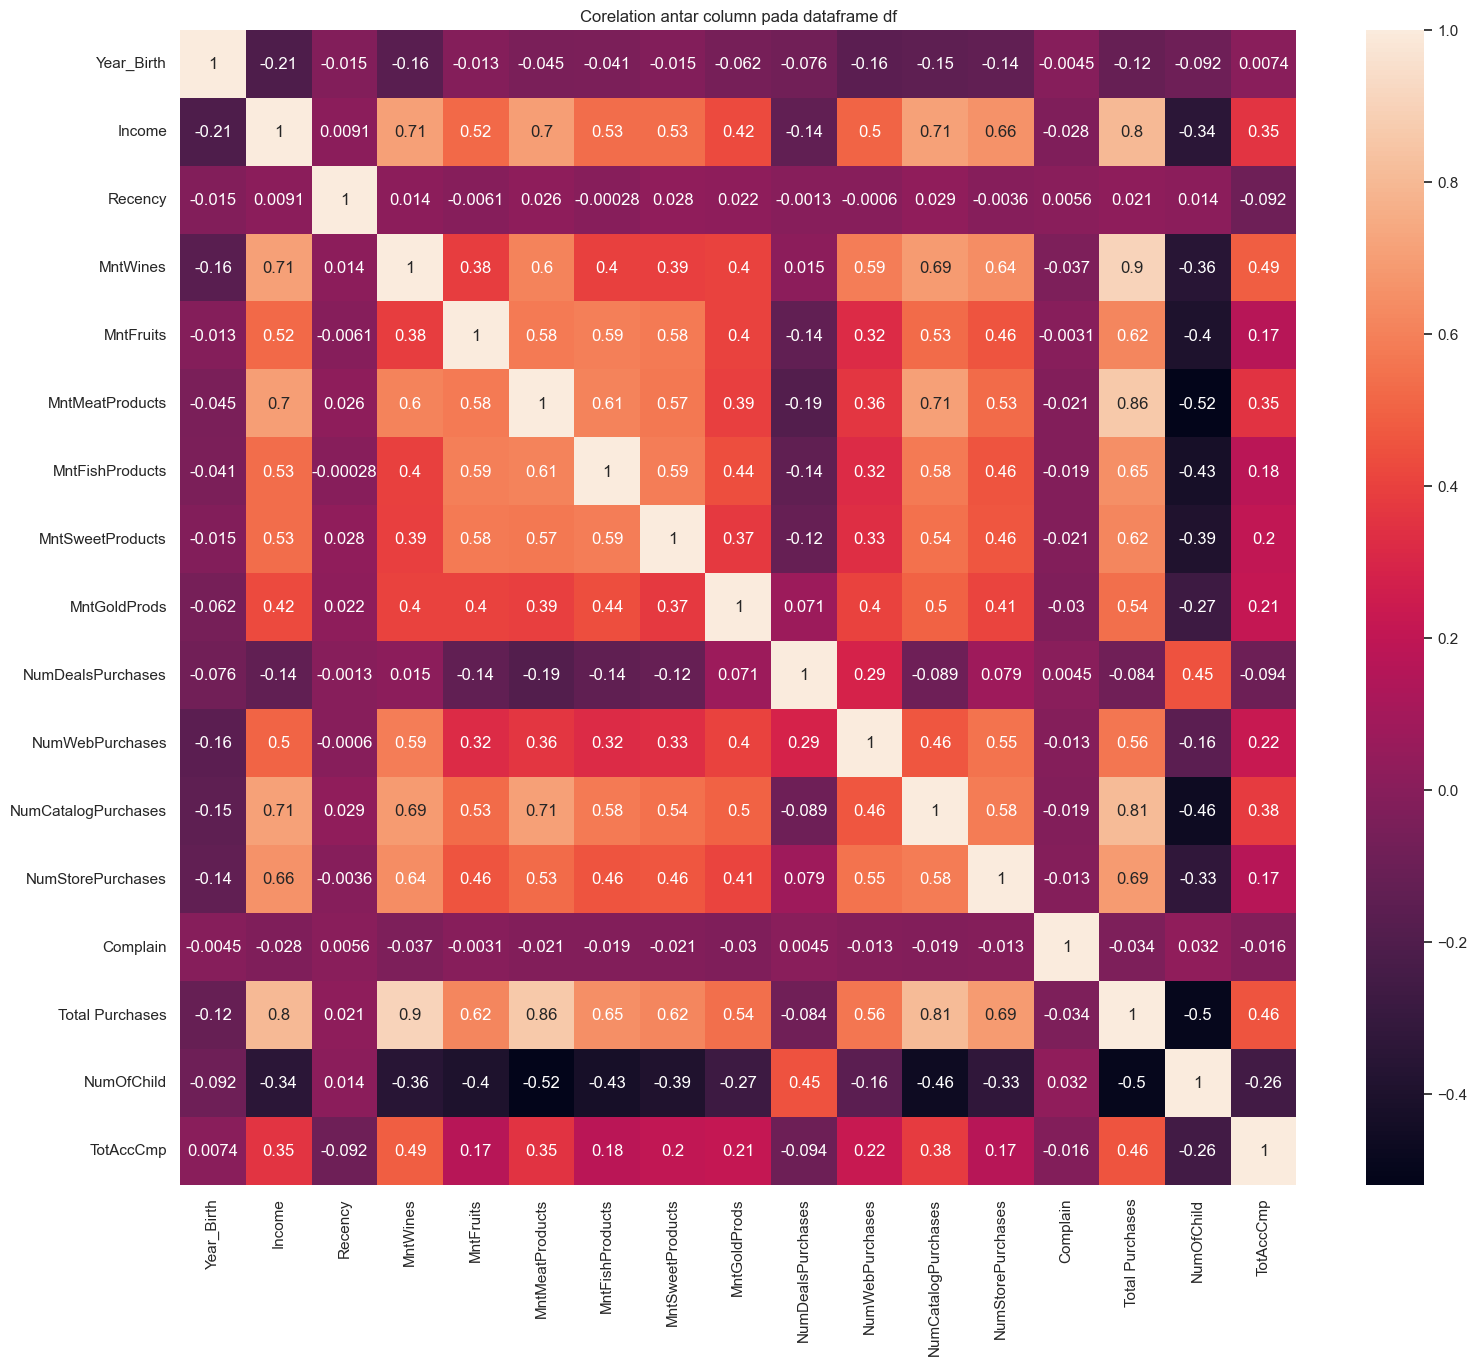

In [98]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True)
plt.title ('Corelation antar column pada dataframe df')
plt.show()

### Data yang sudah bersih

In [99]:
df.head()

,Year_Birth,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total Purchases,NumOfChild,Income Group,TotAccCmp
0,1957,Single,58138.0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,0,1617,0,Middle Income,1
1,1954,Single,46344.0,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,0,27,2,Middle Income,0
2,1965,InRelationship,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,0,776,0,Middle Income,0
3,1984,InRelationship,26646.0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,0,53,1,Low Income,0
4,1981,InRelationship,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,0,422,1,Middle Income,0


In [100]:
print (f'Jumlah baris dan kolom di data set df adalah {df.shape}')
print('Kolom pada data set:')
df.info()

Jumlah baris dan kolom di data set df adalah (2204, 20)
Kolom pada data set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2204 non-null   int64         
 1   Marital_Status       2204 non-null   object        
 2   Income               2204 non-null   float64       
 3   Dt_Customer          2204 non-null   datetime64[ns]
 4   Recency              2204 non-null   int64         
 5   MntWines             2204 non-null   int64         
 6   MntFruits            2204 non-null   int64         
 7   MntMeatProducts      2204 non-null   int64         
 8   MntFishProducts      2204 non-null   int64         
 9   MntSweetProducts     2204 non-null   int64         
 10  MntGoldProds         2204 non-null   int64         
 11  NumDealsPurchases    2204 non-null   int64         
 12  NumWebPurchas

# Data Analysis

#### Total Persentase Banyaknya Customers Berdasarkan Income Group

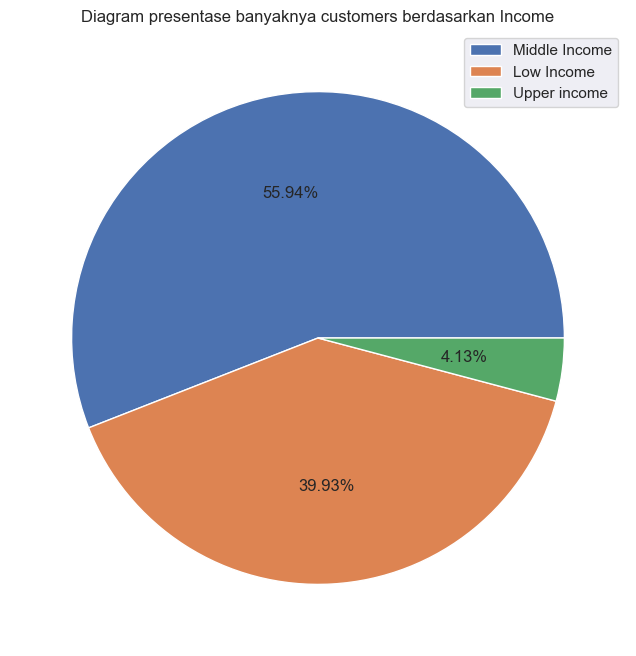

In [101]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Income Group'].value_counts(), autopct = '%.2f%%')
plt.title('Diagram presentase banyaknya customers berdasarkan Income')
plt.legend((df['Income Group'].value_counts()).index)
plt.show()

In [102]:
df['Income Group'].value_counts().sum()

2204

Dari diagram di atas dapat di ambil informasi berupa :
- Customers dari perusahaan di dominasi oleh Customer dengan Middle Income sebesar 55.94% dari total 2204 customers
- Customers paling sedikit di adalah Costumer dengan Upper Income sebesar 4.13% dari total 2204 customers
- Dapat di simpulkan selama 2 tahun terakir target pemasaran perusahaan berfokus pada customer Middle Income 

In [103]:
df_income = df.groupby(['Income Group']).sum().reset_index()
df_income.head()

,Income Group,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Total Purchases,NumOfChild,TotAccCmp
0,Low Income,1735473,27795204.0,43053,42904,4700,22971,7098,4925,15827,2117,2044,512,2871,11,98425,1141,178
1,Middle Income,2424664,78464891.0,60493,574222,47401,292051,67520,47872,73975,2905,6499,4752,9221,8,1103041,947,678
2,Upper income,179327,8063289.0,4608,57923,6100,47720,8628,6752,6478,75,424,540,749,1,133601,3,137


#### Total pembelian Customer dari Setiap product

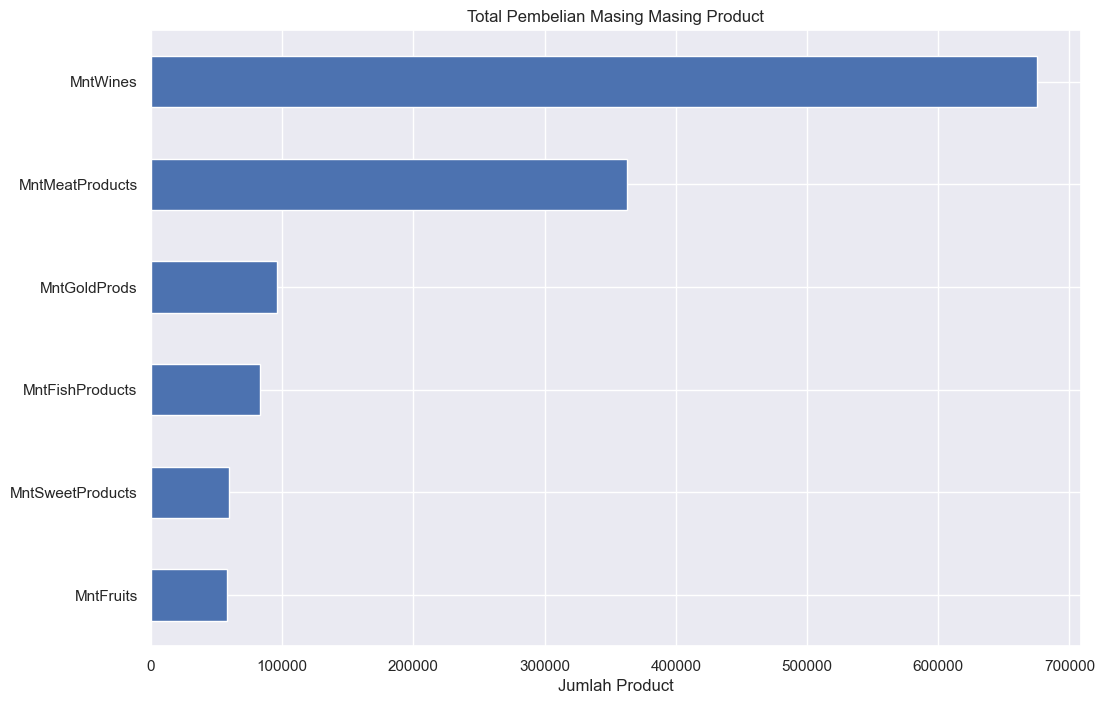

In [104]:
plt.figure(figsize=(12,8))
ax = df[['MntWines', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Total Pembelian Masing Masing Product')
plt.xlabel('Jumlah Product')
plt.show()

Dari Gambar di atas di dapat product paling laku di jual oleh perusahaan adalah produk Wine dan di ikuti oleh produk daging 

Penjualan product Buah terendah dari product lainnya artinya kurang di minati oleh konsumen 

Salah satu yang menonjol adalah penjualan produk emas berada di posisi ke tiga.

#### Selanjutnya saya akan menguji apakah Total Spent Berpengaruh dengan Income Group dengan menggunakan chi-squaretest 

Saya akan membuat data frame hasil dari crosstab dari kolom Income Group dan Total Spent.

In [105]:
df_spent_income =  pd.crosstab(df['Income Group'], df['Total Purchases'])
score, pval, dof, exp =chi2_contingency(df_spent_income)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal Menolak Ho')

Tolak Ho


Dapat di simpulkan bahwa Income Group berpengaruh dengan total purchases 
jadi kenaikan pembelian juga dapat bertambah jika customer bertambah 

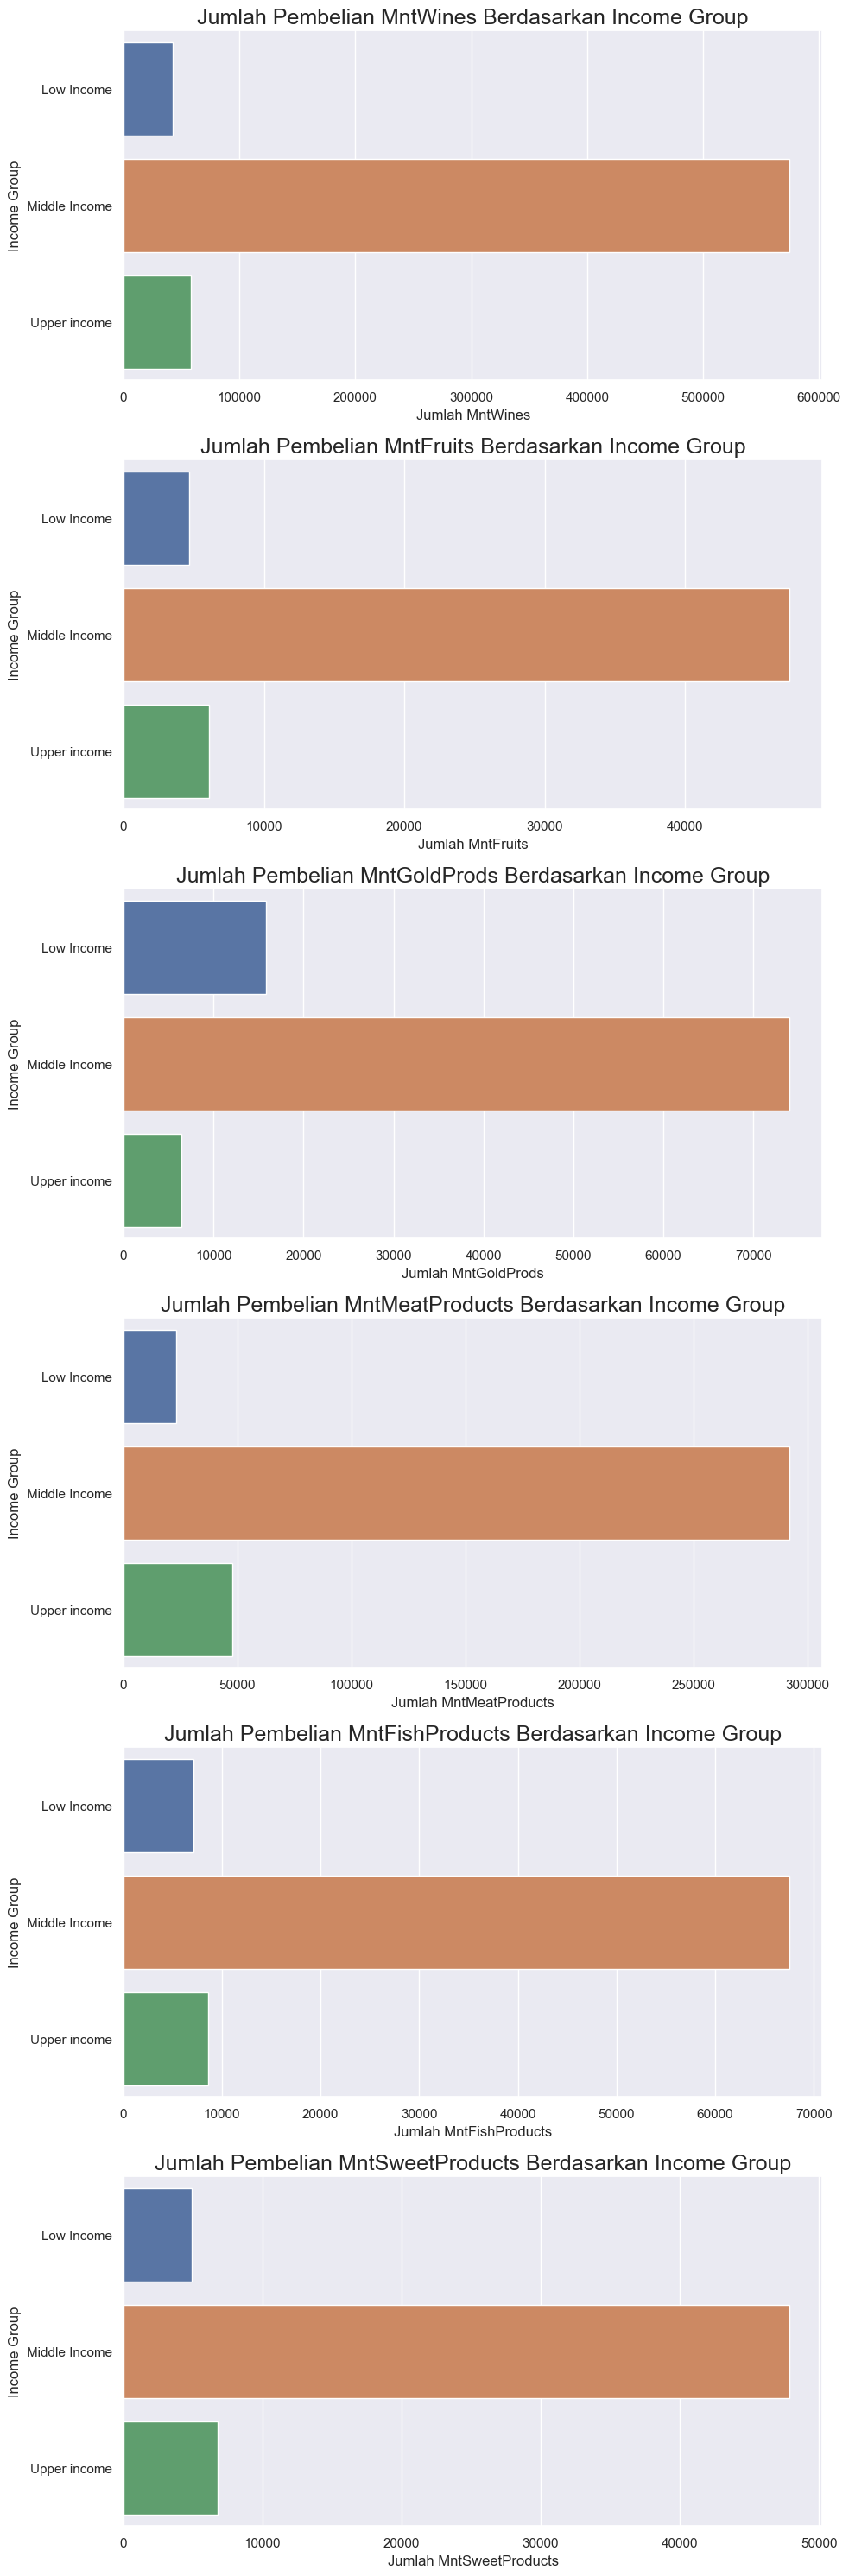

In [106]:
plotnum=1
plt.figure(figsize=(10,30))
for col in ['MntWines', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']:
    ax = plt.subplot(6,1, plotnum)
    sns.barplot(y=df_income['Income Group'], x=df_income[col])
    plt.title(f'Jumlah Pembelian {col} Berdasarkan Income Group', size= 18)
    plt.xlabel(f'Jumlah {col}')
    plt.tight_layout()
    plotnum+=1

Dari diagram di atas di dapat :
- Dari setiap bagian produk customer Middle Income Mendominasi setiap penjualan Produk 
- Dari setiap Penjualan produk hanya penjualan produk gold Customer low Income lebih banyak membeli dari Customer Upper Income 
- Dari setiap product kecuali produk gold daya beli dari Customer low Income lebih lemah yang seharusnya dengan total customer terbanyak ke dua seharusnya dapat melebihi pembelian dari customer Upper Income hal ini kemungkan terjadi karena kurangnya variasi harga produk yang dapat menjangkau customer Low Income

### Perilaku Customer dalam metode pembelian product

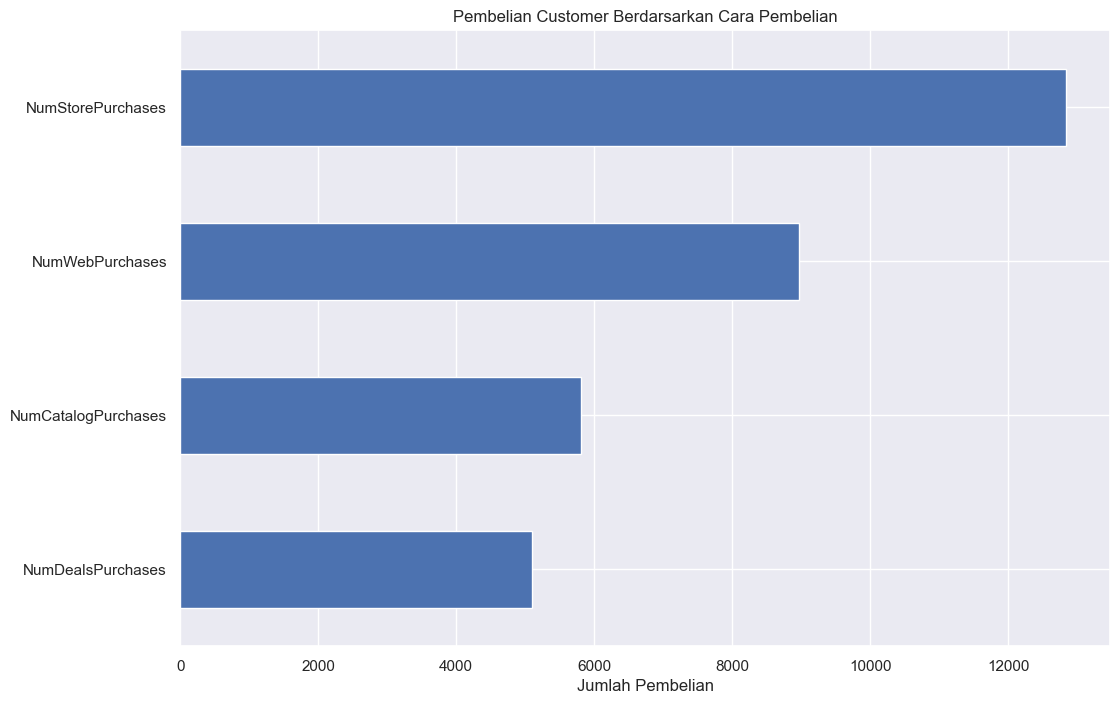

In [107]:
plt.figure(figsize=(12,8))
ax = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Pembelian Customer Berdarsarkan Cara Pembelian')
plt.xlabel('Jumlah Pembelian')
plt.show()

Dari diagram di atas di dapat informasi :
- Customer lebih banyak memilih berbelanja langsung di store perusahaan ketimbang cara lainnya lainya. Hal ini kemungkinan customer ingin menikmati experience berbelanja yang nyata 
- Pembelian Menggunakan web perusahaan dalam performa yang baik karena berada dalam posisi ke dua kesukaan customer dalam berbelanja
- Pembelian menggunakan diskon berada di tingkat paling bawah di bandingkan pembelian lainya

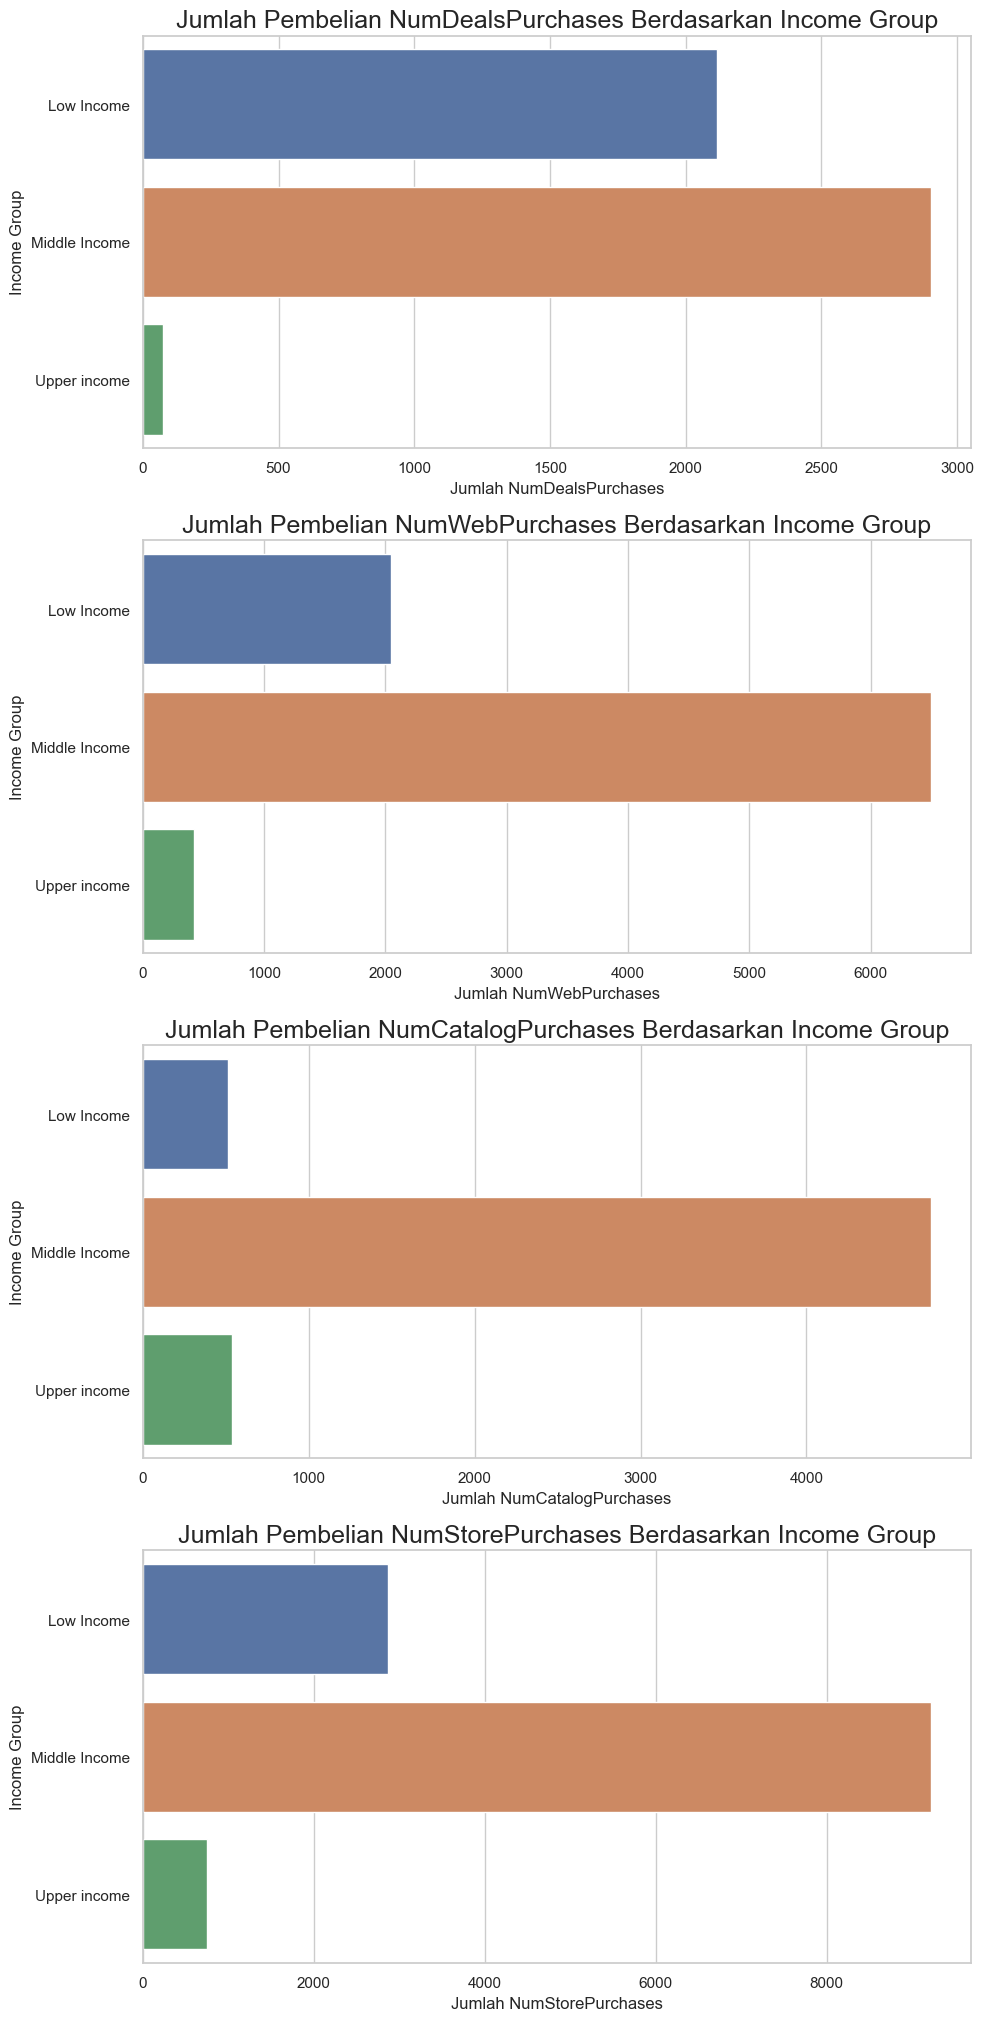

In [108]:
plotnum=1
plt.figure(figsize=(10,30))
sns.set(style='whitegrid', palette='deep')
for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    ax = plt.subplot(6,1, plotnum)
    # df[['Income Group',col]].groupby('Income Group').sum().sort_values(by=col,ascending=False).plot(kind='barh' ,figsize=(12,6))
    sns.barplot(y=df_income['Income Group'], x=df_income[col])
    plt.title(f'Jumlah Pembelian {col} Berdasarkan Income Group', size= 18)
    plt.xlabel(f'Jumlah {col}')
    plt.tight_layout()
    plotnum+=1

Dari diagram dapat di lihat lebih jelas jenis customer yang membeli product :
- Setiap cara pembelian di dominasi oleh customer middle income dikarenakan customer tipe ini lebih banyak kuantitinya di bandingkan yang lain 
- Jika di lihat dari total pembelian dari masing masing cara sangat di sayangkan pembelian menggunakan promo diskon mendapat di posisi akir. karena seharusnya promo di buat untuk menaikan pembelian product ini mungkin terjadi karena campain yang tidak efektif dan tidak mencapai para customer.
- Customer Upper Income lebih bayak memmilih pembelian dengan menggunakan catalog 
- Customer low Income Memanfaatkan promo lebih baik dari customer lainnya 

#### Menguji apakah 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' berhubungan dengan Income Group.

In [109]:

for col in ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    df_spent_income =  pd.crosstab(df['Income Group'], df[col])
    score, pval, dof, exp =chi2_contingency(df_spent_income)
    if pval<=0.05:
        print('Tolak Ho')
    else:
        print('Gagal Menolak Ho')

Tolak Ho
Tolak Ho
Tolak Ho
Tolak Ho


Dapat disimpulkan bahwa adanya pengaruh antara 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' dengan 'Income Group'

### Efektifitas Strategi Campain 

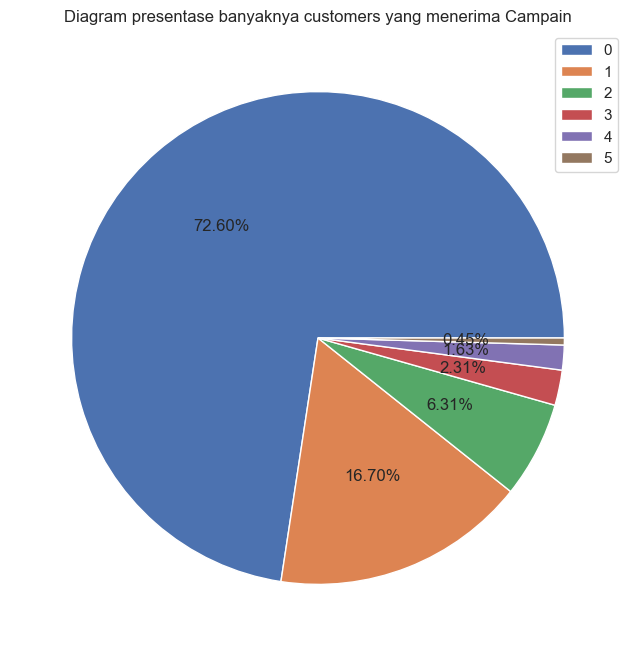

In [110]:
plt.figure(figsize=(10,8))
plt.pie(x=df['TotAccCmp'].value_counts(), autopct = '%.2f%%')
plt.title('Diagram presentase banyaknya customers yang menerima Campain')
plt.legend((df['TotAccCmp'].value_counts()).index)
plt.show()

- Dari grafik di dapat bahwa perlunya di evaluasi kembali untuk strategi campain yang menarik customer mengingat ada 72.6% customer yang tidak mengambil campain.
- perlunya di evaluasi kembali campain yang di terapkan untuk menaikan penjualan product 

## Kesimpulan

Dari analisis yang telah di lakukan, Dapat ditarik kesimpulan berikut tentang customer ideal bagi serta informasi penting bagi perusahaan :

- Dari total 2204 customer, customer terbanyak adalah customer Middle Income Dengan jumlah 1233 Customers.
- Customers ideal untuk perusahaan adalah Customer middle Income dikarenakan customer bagian ini mengungguli setiap penjualan product di bandikan customerlainnya 
- Product yang paling di minati Customers adalah produk wine 
- Meski kendati kuantitas customer Low income banyak tetapi daya pembelian produk dari customer bagian ini sangat rendah di bandingkan customer lainnya hanya ada satu produk yang melebihi pembelian customer Upper Income yaitu pembelian produk wine 
- Selama dua tahun 6 kali campain yang di lakukan bisa di bilang tidak efektif mengingat total jumlah customer yang tidak mengambil campain sebesar 72.6% atau 1600 customers
- Customer low income sangat memanfaatkan pembelian dengan menggunakan diskon 

## Rekomendasi

- Manfaatkan total customer bagian Low Income dengan lebih memvariasikan product yang di jual yang dapat di beli oleh bagian customer ini mengingat kuantitas customer ini kedua terbanyak
- Penjualan bisa di fokuskan terhdap Low income dan Medium income dimana kedua bagian customer ini memiliki kuantitas yang banyak
- Perlu di tingkatkan kembali campain yang di lakukan perusahaan mengingat masih banyak customer yang tidak menerima campain yang di jalakan yang mempengaruhi penjualan produk diskon yang lesu 